# Importing Library files

* pandas was required for reading the csv file
* numpy was required for array manupulation
* matplotlib is required plot graphs
* seaborn is used to make charts look better

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Reading the CSV file where the data is saved
Incase of any missing data fillna was used to remove error
later a new data column text was made by combining all the columns, this is done to observe the data collectively

In [2]:
df=pd.read_csv('reddit.csv')
df.body.fillna(' ',inplace=True)
df.comments.fillna(' ',inplace=True)
df.title.fillna(' ',inplace=True)
df.flair.fillna(' ',inplace=True)
df=df.sample(frac=1)
df['text'] = df['title'].astype(str)+' ' + df['body'].astype(str) + " " + df['comments'].astype(str)

Number of words in each submission is checked and then plotted against their frequency

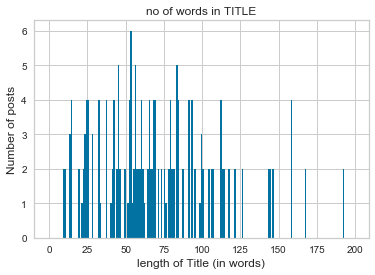

In [9]:
temp = df['title'].str.len()

temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of Title (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

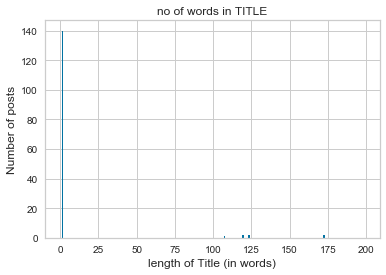

In [11]:
temp = df['body'].str.len()

temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")co
plt.xlabel("length of body (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

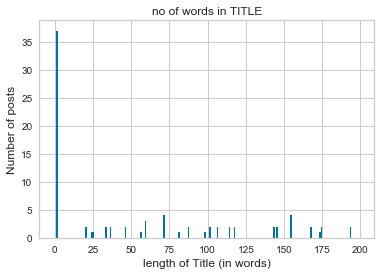

In [12]:
temp = df['comments'].str.len()

temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of comments (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

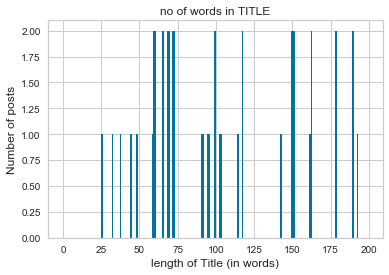

In [13]:
temp = df['text'].str.len()

temp.hist(bins = np.arange(0,200,1))
plt.title("no of words in TITLE")
plt.xlabel("length of text (in words)", fontsize=12)
plt.ylabel("Number of posts", fontsize=12)
plt.savefig('title.png', dpi=300, bbox_inches='tight')
plt.show()

This shows that for title number of words is equally divided.Other than that body and comments it is densely populated for less number of words. 
However, for number of texts it is again evenly divided.

In [17]:
used_df=pd.DataFrame()
used_df['flair']=df['flair']
used_df['b_length']=df['body'].str.count(' ')+1
used_df['ti_length']=df['title'].str.count(' ')+1
used_df['c_length']=df['comments'].str.count(' ')+1
used_df['t_length']=df['text'].str.count(' ')+1

count    14.000000
mean     11.904501
std       5.870151
min       3.000000
25%       7.625000
50%      13.370130
75%      16.929487
max      20.052632
Name: ti_length, dtype: float64

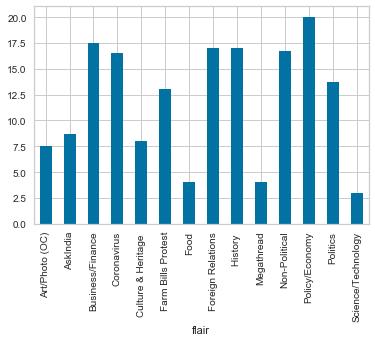

In [18]:
f=used_df.groupby('flair').mean().ti_length
f.plot(kind='bar')
f.describe()

count      14.000000
mean      988.688427
std      2028.535817
min        22.666667
25%       138.333333
50%       332.195652
75%       704.093750
max      7842.750000
Name: t_length, dtype: float64

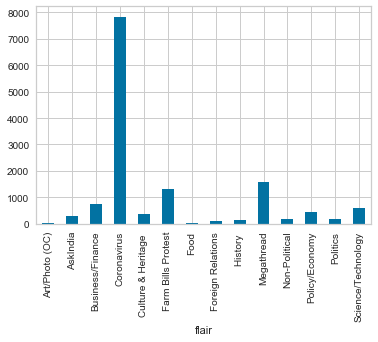

In [20]:
f=used_df.groupby('flair').mean().t_length
f.plot(kind='bar')
f.describe()

count     14.000000
mean      97.140055
std      147.171510
min        2.000000
25%        2.000000
50%       25.337662
75%      109.270833
max      466.000000
Name: b_length, dtype: float64

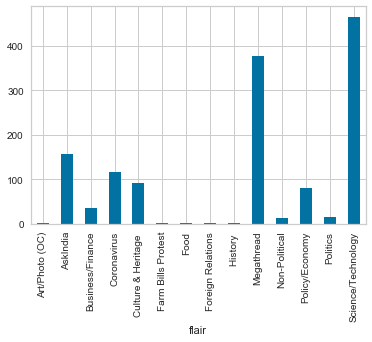

In [21]:
f=used_df.groupby('flair').mean().b_length
f.plot(kind='bar')
f.describe()

count      14.000000
mean      879.643871
std      2010.308788
min        16.666667
25%       109.271739
50%       152.925241
75%       602.560855
max      7711.000000
Name: c_length, dtype: float64

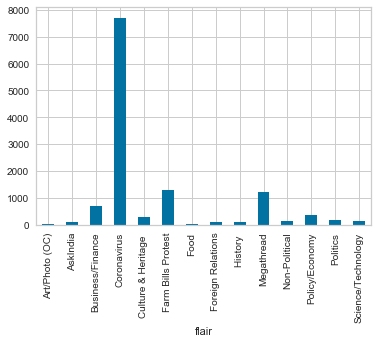

In [22]:
f=used_df.groupby('flair').mean().c_length
f.plot(kind='bar')
f.describe()

This shows that  number of words in body, could be used as a feature 

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
z=df['flair'].unique()
tfidf = TfidfVectorizer()
y = df['flair']

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

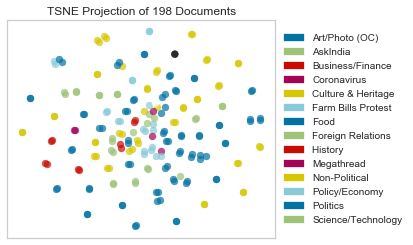

In [7]:
x = tfidf.fit_transform(df['text'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

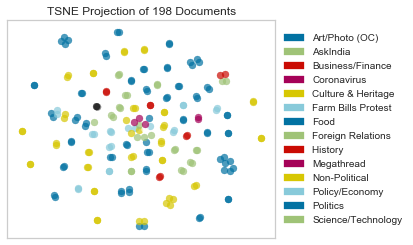

In [23]:
x = tfidf.fit_transform(df['title'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

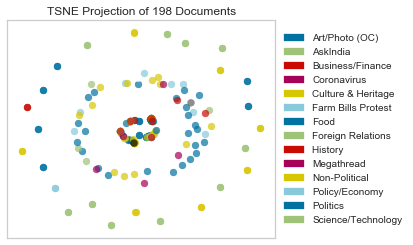

In [24]:
x = tfidf.fit_transform(df['body'])
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

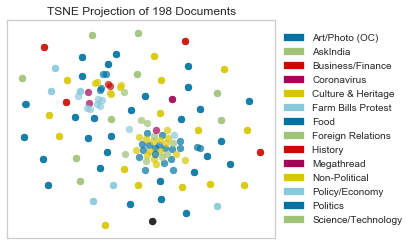

In [27]:
x = tfidf.fit_transform(df.comments)
y = df['flair']
tsne = TSNEVisualizer(labels=z)
tsne.fit(x, y)
tsne.poof()

This shows that in most flairs the data is spread out in all dimensions

In [28]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
from yellowbrick.features import RadViz
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer
vectorizer = CountVectorizer(stop_words=stopwords)

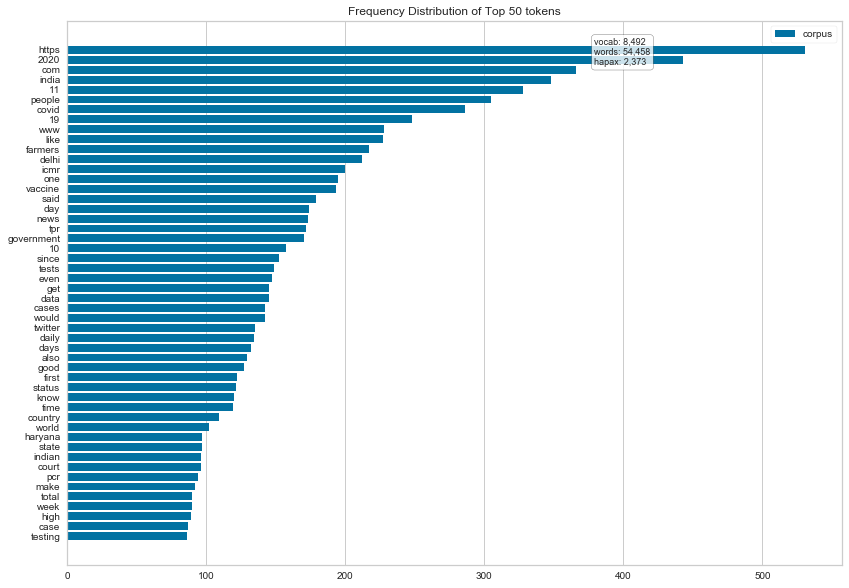

In [30]:
docs = vectorizer.fit_transform(df['text'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000,720))
visualizer.fit(docs)
visualizer.poof()

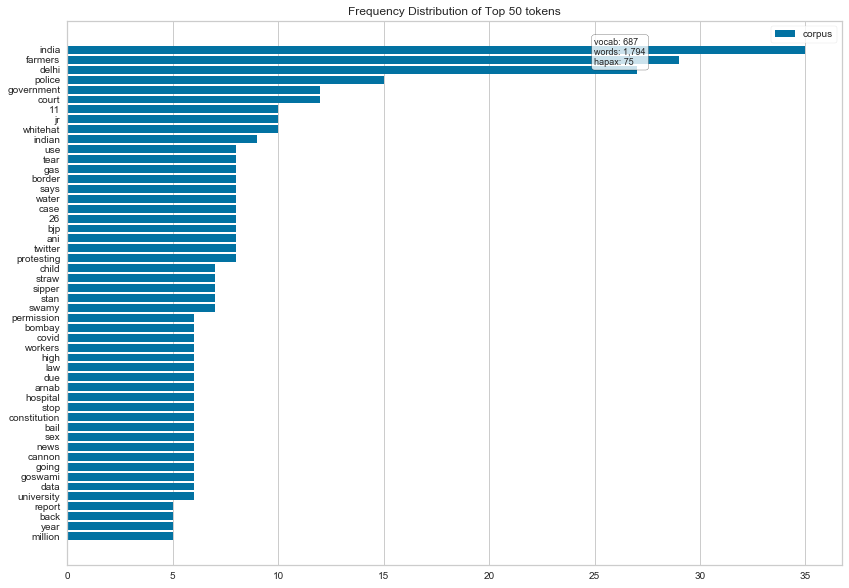

In [32]:
docs = vectorizer.fit_transform(df['title'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000,720))
visualizer.fit(docs)
visualizer.poof()

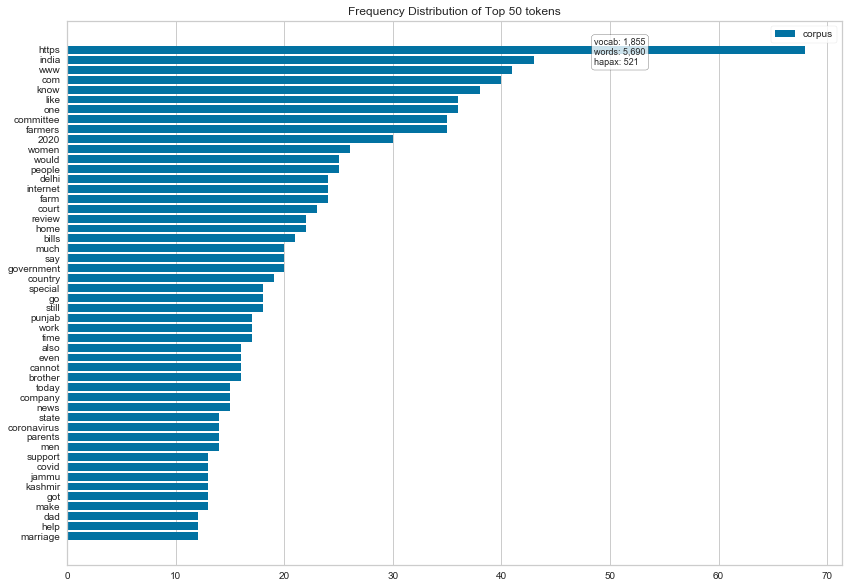

In [33]:
docs = vectorizer.fit_transform(df['body'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000,720))
visualizer.fit(docs)
visualizer.poof()

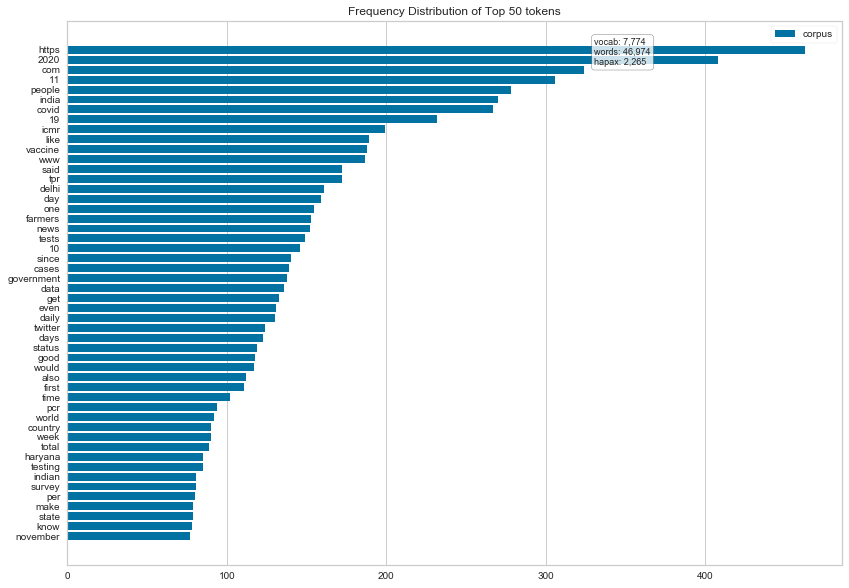

In [34]:
docs = vectorizer.fit_transform(df['comments'])
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features,size=(1000,720))
visualizer.fit(docs)
visualizer.poof()

This shows that words such as 'http','2020','India' are quite commonly used in the datset.